In [89]:
using OptimalTransportDataIntegration
using Distributions
using DocStringExtensions
using Parameters
using Printf
using DataFrames
using Flux

In [ ]:
params = DataParameters(nA = 10,
    nB = 10,
    mA = [0.0],
    mB = [4.0],
    covA = ones(1,1),
    covB = ones(1,1),
    aA = [1.0],
    aB = [1.0],
    r2 = 0.6)
 
rng = ContinuousDataGenerator(params; scenario = 2)
data = generate(rng)

┌ Info: Categories in YA OrderedCollections.OrderedDict(1 => 2575, 2 => 2417, 3 => 2487, 4 => 2521)
└ @ OptimalTransportDataIntegration c:\Users\vgares\Documents\GitHub\OptimalTransportDataIntegration.jl\src\generate_continuous_data.jl:124
┌ Info: Categories in ZA OrderedCollections.OrderedDict(1 => 3341, 2 => 3313, 3 => 3346)
└ @ OptimalTransportDataIntegration c:\Users\vgares\Documents\GitHub\OptimalTransportDataIntegration.jl\src\generate_continuous_data.jl:125
┌ Info: Categories in YB OrderedCollections.OrderedDict(1 => 2320, 2 => 2573, 3 => 2558, 4 => 2549)
└ @ OptimalTransportDataIntegration c:\Users\vgares\Documents\GitHub\OptimalTransportDataIntegration.jl\src\generate_continuous_data.jl:126
┌ Info: Categories in ZB OrderedCollections.OrderedDict(1 => 3142, 2 => 3494, 3 => 3364)
└ @ OptimalTransportDataIntegration c:\Users\vgares\Documents\GitHub\OptimalTransportDataIntegration.jl\src\generate_continuous_data.jl:127


Row,X1,Y,Z,database
,Float64,Int64,Int64,Int64
1,1.20418,4,3,1
2,0.305254,3,2,1
3,0.626319,3,2,1
4,0.614023,2,2,1
5,-0.306486,2,1,1
6,1.16694,3,3,1
7,0.490182,3,3,1
8,0.289544,2,2,1
9,0.881282,3,3,1


In [152]:
dba = subset(data, :database => ByRow(==(1)))
dbb = subset(data, :database => ByRow(==(2)))


cols = names(dba, r"^X")   

XA = transpose(Matrix(dba[:, cols]))
XB = transpose(Matrix(dbb[:, cols]))

XAi = round.(XA)
XBj = round.(XB)

1×10000 Matrix{Float64}:
 5.0  4.0  4.0  4.0  4.0  5.0  4.0  3.0  …  4.0  3.0  5.0  3.0  2.0  2.0  3.0

In [117]:
XA
XB

1×10 transpose(::Matrix{Float64}) with eltype Float64:
 2.94438  4.66342  4.1699  2.81765  …  4.72449  5.46386  2.99034  4.40834

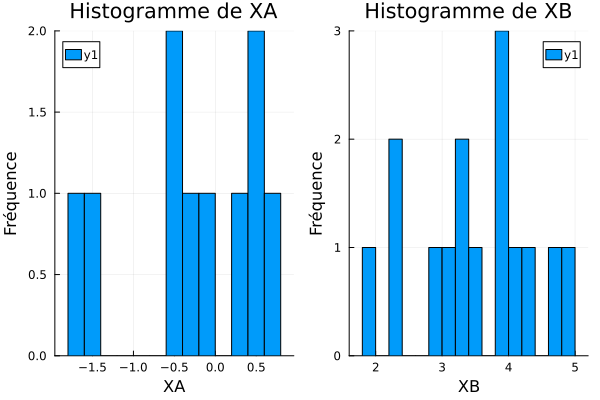

In [93]:
plot(
    histogram(vec(XA), bins=20, xlabel="XA", ylabel="Fréquence", title="Histogramme de XA"),
    histogram(vec(XB), bins=20, xlabel="XB", ylabel="Fréquence", title="Histogramme de XB"),
    layout = (1,2)   # 1 ligne, 2 colonnes
)


In [153]:
Ylevels = 1:4
Zlevels = 1:3
YA = Flux.onehotbatch(dba.Y, Ylevels)
ZB = Flux.onehotbatch(dbb.Z, Zlevels)



3×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  1  1  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  …  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  1  ⋅  ⋅  1
 1  ⋅  1  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [119]:
show(dba.Y)
show(YA)

[1, 4, 1, 4, 2, 4, 1, 4, 3, 2]Bool[1 0 1 0 0 0 1 0 0 0; 0 0 0 0 1 0 0 0 0 1; 0 0 0 0 0 0 0 0 1 0; 0 1 0 1 0 1 0 1 0 0]

In [25]:
show(dbb.Z)
show(ZB)

[3, 1, 2, 1, 3, 2, 2, 1, 1, 3]Bool[0 1 0 1 0 0 0 1 1 0; 0 0 1 0 0 1 1 0 0 0; 1 0 0 0 1 0 0 0 0 1]

In [154]:
using Distances
nA = size(dba, 1)
nB = size(dbb, 1)

wa = ones(nA) ./ nA
wb = ones(nB) ./ nB

C0 = pairwise(Euclidean(), XA, XB, dims = 2)

C = C0 #./ maximum(C0)
display(C)
display(wa)
display(wb)

10000×10000 Matrix{Float64}:
 3.36367  2.37394  3.21951  2.41419  …  1.96511  0.83512   1.2795   2.01399
 4.2626   3.27286  4.11843  3.31312     2.86404  1.73405   2.17843  2.91291
 3.94153  2.9518   3.79737  2.99205     2.54297  1.41298   1.85736  2.59185
 3.95383  2.96409  3.80966  3.00435     2.55527  1.42528   1.86966  2.60414
 4.87434  3.8846   4.73017  3.92486     3.47578  2.34579   2.79017  3.52465
 3.40091  2.41118  3.25675  2.45143  …  2.00235  0.872358  1.31674  2.05123
 4.07767  3.08794  3.93351  3.12819     2.67911  1.54912   1.9935   2.72799
 4.27831  3.28857  4.13414  3.32883     2.87975  1.74976   2.19414  2.92862
 3.68657  2.69684  3.54241  2.73709     2.28801  1.15802   1.6024   2.33689
 4.27202  3.28228  4.12785  3.32253     2.87345  1.74346   2.18784  2.92233
 ⋮                                   ⋱                              
 4.9243   3.93457  4.78014  3.97482     3.52574  2.39575   2.84013  3.57462
 4.51759  3.52786  4.37343  3.56811     3.11903  1.98904   2.43342

10000-element Vector{Float64}:
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 ⋮
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001

10000-element Vector{Float64}:
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 ⋮
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001

In [155]:
using PythonOT

reg = 0.0
reg_m1 = 0.0
reg_m2 = 0.0
G = ones(length(wa), length(wb))

#if reg > 0
#        G .= PythonOT.mm_unbalanced(wa, wb, C, (reg_m1, reg_m2); reg = reg, div = "kl")
#else
G .= PythonOT.emd(wa, wb, C)
#end
show(size(ZB))
show(size(G'))
show(size(YA))
ZApred =  nA .* ZB * G'
YBpred =nB .* YA * G

(3

C:\Users\vgares\.julia\conda\3\x86_64\Lib\site-packages\ot\lp\__init__.py:388: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


, 10000)(10000, 10000)(4, 10000)

4×10000 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  …  0.0  1.0  0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0     1.0  0.0  1.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [156]:
display(XAi)
display(sort(vec(XAi)))
io = sortperm(vec(XAi))
display(sort(vec(YA[io])))
display(sort(vec(dba.Z[io])))
display(io)
display(sort(vec(XBj)))
jo = sortperm(vec(XBj)) 
display(jo)
display(sort(vec(ZB[io])))
display(sort(vec(dbb.Y[io])))
A = G[io,:]
display(A)
B=A[:,jo]
display(B)

1×10000 Matrix{Float64}:
 1.0  0.0  1.0  1.0  -0.0  1.0  0.0  0.0  …  -1.0  -0.0  0.0  -0.0  -1.0  1.0

10000-element Vector{Float64}:
 -4.0
 -4.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
  ⋮
  3.0
  3.0
  3.0
  3.0
  3.0
  4.0
  4.0
  4.0
  4.0

10000-element Vector{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

10000-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3

10000-element Vector{Int64}:
 2994
 7656
   85
  633
  969
 1372
 1448
 1681
 1790
 1847
    ⋮
 8960
 9402
 9469
 9643
 9870
 1335
 5335
 5723
 6394

10000-element Vector{Float64}:
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 7.0
 7.0
 7.0
 7.0
 7.0
 8.0
 8.0
 8.0
 8.0

10000-element Vector{Int64}:
 2801
 7479
  175
 1278
 1303
 1322
 1426
 1696
 1714
 2241
    ⋮
 8996
 9284
 9444
 9833
 9939
 1902
 4858
 8578
 9154

10000-element Vector{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

10000-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 4
 4
 4
 4
 4
 4
 4
 4
 4

10000×10000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

10000×10000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [131]:
pos_idx = findall(x -> x > 0, G)
display(pos_idx)

10-element Vector{CartesianIndex{2}}:
 CartesianIndex(7, 1)
 CartesianIndex(10, 2)
 CartesianIndex(1, 3)
 CartesianIndex(6, 4)
 CartesianIndex(5, 5)
 CartesianIndex(8, 6)
 CartesianIndex(4, 7)
 CartesianIndex(3, 8)
 CartesianIndex(2, 9)
 CartesianIndex(9, 10)

In [150]:
XAv=vec(XA)
XBv=vec(XB)
show(pos_idx[1])
show(XAv[pos_idx[1][1]])
show(XBv[pos_idx[1][2]])

show(XAv[pos_idx[2][1]])
show(XBv[pos_idx[2][2]])


CartesianIndex(7, 1)0.080560571327122632.94438009029191730.76229339241750854.663418083328606

In [157]:
using Flux
display(ZB)
display(dbb.Z)
display(G)
show(Flux.onecold(ZApred))
show(accuracy(Flux.onecold(ZApred), dba.Z))


3×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  1  1  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  …  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  1  ⋅  ⋅  1
 1  ⋅  1  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

10000-element Vector{Int64}:
 3
 1
 3
 1
 1
 3
 3
 2
 1
 2
 ⋮
 3
 1
 2
 1
 2
 2
 1
 1
 2

10000×10000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

[1, 3, 3, 2, 1, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 3, 3, 2, 2, 1, 1, 3, 3, 2, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 3, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 1, 2, 2, 2, 3, 1, 2, 3, 2, 2, 3, 1, 1, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 1, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 1, 

In [67]:
display(G)
display(G')
display(dbb.Z)
display(dba.Z)

10×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0
 0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0
 0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0
 0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0

10×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1
 0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0
 0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

10-element Vector{Int64}:
 3
 1
 2
 1
 3
 2
 2
 1
 1
 3

10-element Vector{Int64}:
 3
 2
 1
 3
 2
 3
 3
 2
 2
 1